In [1]:
#importing necessary libraries

import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets

### A - NCDC Website Scrap

In [2]:
url = 'https://covid19.ncdc.gov.ng/'

In [3]:
df = pd.read_html(url)

In [4]:
CovidNcdc = pd.DataFrame(df[0])
CovidNcdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,99738,907,98062,769
1,FCT,28701,29,28423,249
2,Rivers,16701,27,16520,154
3,Kaduna,11307,3,11215,89
4,Plateau,10256,1,10180,75


### B - John Hopkins Data Repository

In [5]:
# Global Daily Confirmed Cases
globalConfirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_globalConfirmed = pd.read_csv(globalConfirmed) 

In [6]:
# Global Daily Recovered Cases
globalRecovery = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
df_globalRecovery = pd.read_csv(globalRecovery)

In [7]:
# Global Daily Death Cases
globalDeath = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
df_globalDeath = pd.read_csv(globalDeath)

### C - External Data

In [8]:
# Budget
budget = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/Budget%20data.csv'
df_budget = pd.read_csv(budget)

In [9]:
#Real GDP
gdp = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/RealGDP.csv'
df_realGDP = pd.read_csv(gdp)

In [10]:
# Covid External
covidExternal = 'https://raw.githubusercontent.com/Ustacky-dev/Nigeria-COVID-19-Data-Analysis-Using-Python/main/covid_external.csv'
df_covidExternal = pd.read_csv(covidExternal)

# Viewing The Data

In [11]:
CovidNcdc.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,99738,907,98062,769
1,FCT,28701,29,28423,249
2,Rivers,16701,27,16520,154
3,Kaduna,11307,3,11215,89
4,Plateau,10256,1,10180,75


In [12]:
CovidNcdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [13]:
df_globalConfirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [14]:
df_globalRecovery.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_globalRecovery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Columns: 882 entries, Province/State to 6/17/22
dtypes: float64(2), int64(878), object(2)
memory usage: 1.8+ MB


In [16]:
df_globalDeath.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7709,7709,7709,7709,7709,7710,7710,7710,7713,7713
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [17]:
df_globalDeath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 882 entries, Province/State to 6/17/22
dtypes: float64(2), int64(878), object(2)
memory usage: 1.9+ MB


In [18]:
df_budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [19]:
df_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [20]:
df_realGDP.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [21]:
df_realGDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [22]:
df_covidExternal.rename(columns = {'states': 'States'}, inplace=True)

In [23]:
df_covidExternal.head()

,States,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [24]:
df_covidExternal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   States                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


# Data Cleaning And Preparation

In [25]:
#Renaming columns in the scraped data
CovidNcdc.columns = ['States', 'Lab_Confirmed_Cases', 'Admitted_Cases', 'Discharged', 'Deaths']

In [26]:
CovidNcdc.head()

,States,Lab_Confirmed_Cases,Admitted_Cases,Discharged,Deaths
0,Lagos,99738,907,98062,769
1,FCT,28701,29,28423,249
2,Rivers,16701,27,16520,154
3,Kaduna,11307,3,11215,89
4,Plateau,10256,1,10180,75


In [27]:
#renaming a column
df_globalConfirmed.rename(columns = {'Country/Region': 'Country'}, inplace=True)

In [28]:
#drop irrelevant columns and column with NaN values
df_globalConfirmed.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)

In [29]:
df_globalConfirmed.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,180784,180864,180864,180864,180864,181120,181178,181236,181465,181534
1,Albania,0,0,0,0,0,0,0,0,0,...,276518,276583,276638,276690,276731,276731,276821,276821,276821,277141
2,Algeria,0,0,0,0,0,0,0,0,0,...,265909,265920,265925,265925,265927,265937,265943,265952,265964,265968
3,Andorra,0,0,0,0,0,0,0,0,0,...,43224,43224,43224,43224,43224,43224,43224,43449,43449,43449
4,Angola,0,0,0,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,99761,99761,99761


In [30]:
#renaming a column
df_globalRecovery.rename(columns = {'Country/Region': 'Country'}, inplace=True)

In [31]:
#drop irrelevant columns and column with NaN values
df_globalRecovery.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
df_globalRecovery.head()


,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Albania,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Andorra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#renaming a column
df_globalDeath.rename(columns = {'Country/Region': 'Country'}, inplace=True)
#drop irrelevant columns and column with NaN values
df_globalDeath.drop(['Province/State','Lat', 'Long'], axis = 1,inplace = True)
df_globalDeath.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,7709,7709,7709,7709,7709,7710,7710,7710,7713,7713
1,Albania,0,0,0,0,0,0,0,0,0,...,3497,3497,3497,3497,3497,3497,3497,3497,3497,3497
2,Algeria,0,0,0,0,0,0,0,0,0,...,6875,6875,6875,6875,6875,6875,6875,6875,6875,6875
3,Andorra,0,0,0,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,Angola,0,0,0,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [33]:
nigDayConfirmed = df_globalConfirmed[df_globalConfirmed["Country"] == "Nigeria"]
nigDayConfirmed

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
204,Nigeria,0,0,0,0,0,0,0,0,0,...,256227,256264,256264,256352,256352,256352,256404,256404,256467,256467


In [34]:
columns = nigDayConfirmed.iloc[:, 4:]

df_nigDayConfirmed = nigDayConfirmed.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigDayConfirmed["Date"] = df_nigDayConfirmed["Date"].apply(pd.to_datetime, errors='coerce')

df_nigDayConfirmed.tail(5)

,Date,Cases
870,2022-06-13,256352
871,2022-06-14,256404
872,2022-06-15,256404
873,2022-06-16,256467
874,2022-06-17,256467


In [35]:
nigDayRecovery = df_globalRecovery[df_globalRecovery["Country"] == "Nigeria"]
nigDayRecovery

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
189,Nigeria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
columns = nigDayRecovery.iloc[:, 4:]

df_nigDayRecovery = nigDayRecovery.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigDayRecovery["Date"] = df_nigDayRecovery["Date"].apply(pd.to_datetime, errors='coerce')

df_nigDayRecovery.tail(5)

,Date,Cases
870,2022-06-13,0
871,2022-06-14,0
872,2022-06-15,0
873,2022-06-16,0
874,2022-06-17,0


In [37]:
nigDayDeath = df_globalDeath[df_globalDeath["Country"] == "Nigeria"]
nigDayDeath

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,6/8/22,6/9/22,6/10/22,6/11/22,6/12/22,6/13/22,6/14/22,6/15/22,6/16/22,6/17/22
204,Nigeria,0,0,0,0,0,0,0,0,0,...,3148,3148,3144,3144,3144,3144,3144,3144,3144,3144


In [38]:
columns = nigDayDeath.iloc[:, 4:]

df_nigDayDeath = nigDayDeath.melt(value_vars=columns, var_name="Date", value_name="Cases")
df_nigDayDeath["Date"] = df_nigDayDeath["Date"].apply(pd.to_datetime, errors='coerce')

df_nigDayDeath.tail(5)

,Date,Cases
870,2022-06-13,3144
871,2022-06-14,3144
872,2022-06-15,3144
873,2022-06-16,3144
874,2022-06-17,3144


# Analysis And Visualizations

Text(0.5, 1.0, 'Top 10 states in terms of Confirmed Covid cases by Laboratory test')

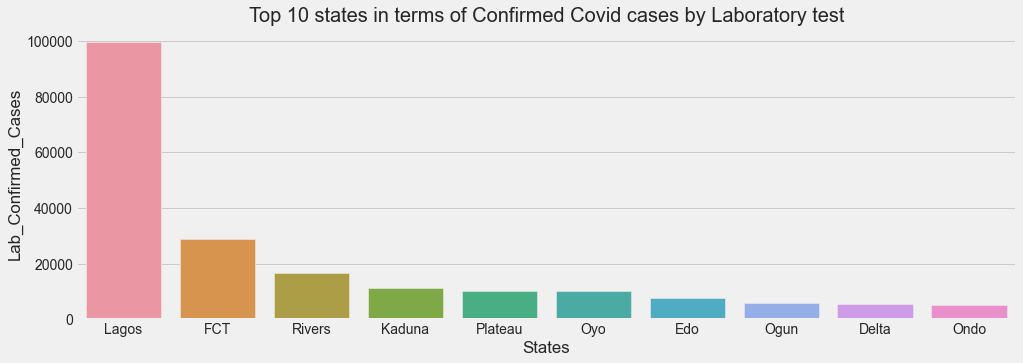

In [39]:
#Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory text
nigConfirmedTop10=CovidNcdc.sort_values(by=['Lab_Confirmed_Cases'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Lab_Confirmed_Cases', data = nigConfirmedTop10).set_title("Top 10 states in terms of Confirmed Covid cases by Laboratory test", fontdict = { 'fontsize': 20})

#### Lagos has the highest number of cases confirmed in the laboratory

Text(0.5, 1.0, 'Top 10 states in terms of Discharged Covid cases')

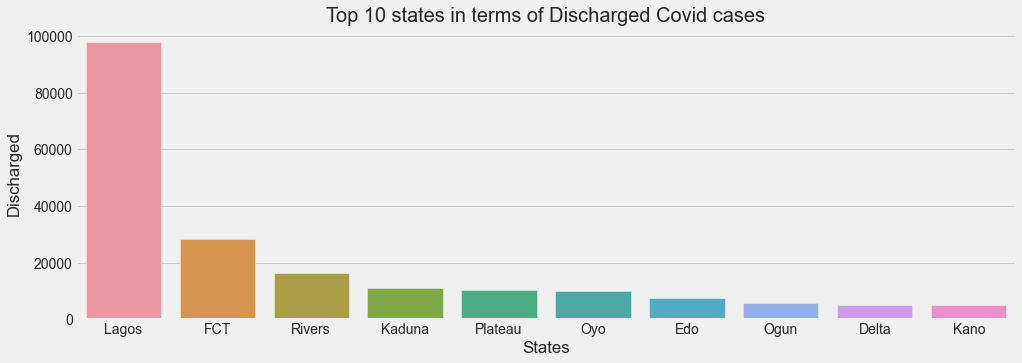

In [40]:
nigRecoveryTop10 = CovidNcdc.sort_values(by=['Discharged'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Discharged', data =nigRecoveryTop10  ).set_title("Top 10 states in terms of Discharged Covid cases", fontdict = { 'fontsize': 20})

#### Lagos has the most discharged cases while Kano has displaced Ondo if compared with the laboratory cases plot above

Text(0.5, 1.0, 'Top 10 states in terms of Deaths')

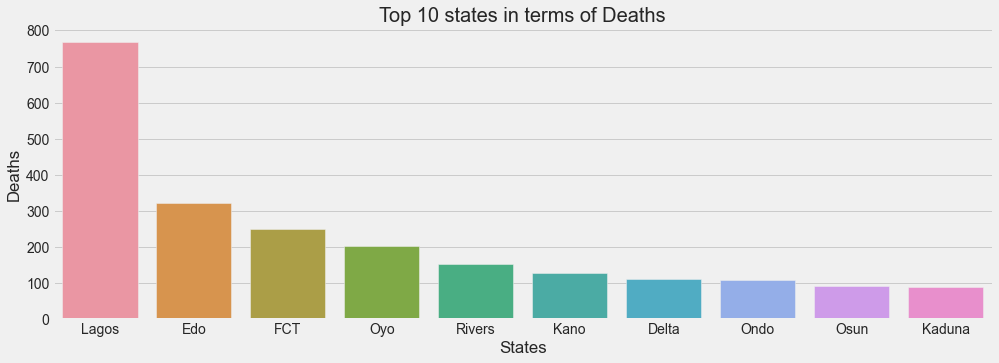

In [41]:
nigDayDeathTop10 = CovidNcdc.sort_values(by=['Deaths'], ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(x = 'States', y= 'Deaths', data = nigDayDeathTop10).set_title("Top 10 states in terms of Deaths", fontdict = { 'fontsize': 20})

#### Lagos leads in terms of number of death cases recorded due to covid-19 while some states made their ways to the top 10 states when compared the two plots above.

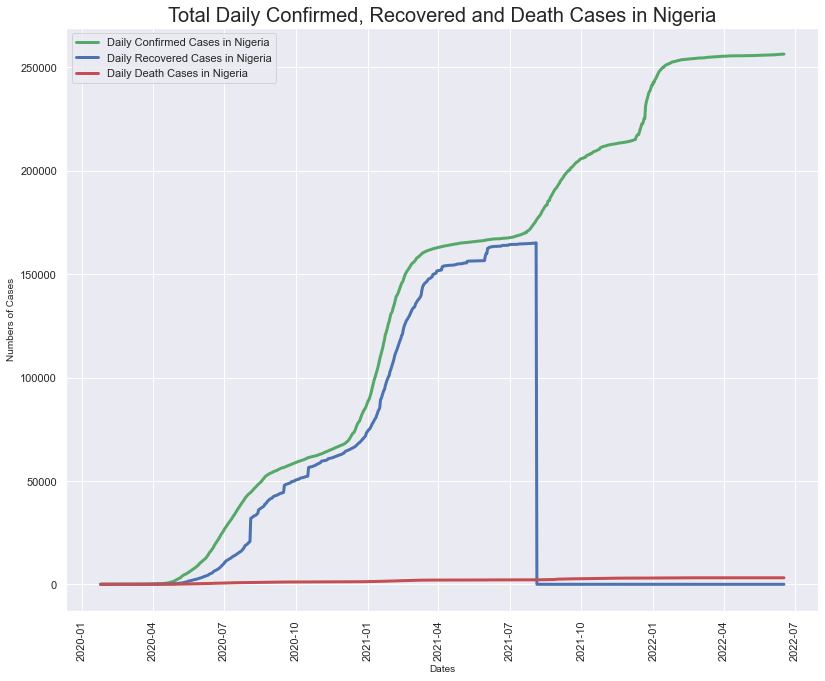

In [42]:
# Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria
sns.set(rc={'figure.figsize':(12,10)})

sns.lineplot(df_nigDayConfirmed.Date, df_nigDayConfirmed.Cases,linewidth=3, label="Daily Confirmed Cases in Nigeria", color="g", markers="o")

sns.lineplot(df_nigDayRecovery.Date, df_nigDayRecovery.Cases,linewidth=3, label="Daily Recovered Cases in Nigeria", color="b")

sns.lineplot(df_nigDayDeath.Date, df_nigDayDeath.Cases,linewidth=3, label="Daily Death Cases in Nigeria", color="r")


plt.xlabel("Dates", fontsize=10)
plt.ylabel("Numbers of Cases", fontsize=10)
plt.xticks(rotation=90)
plt.title ("Total Daily Confirmed, Recovered and Death Cases in Nigeria", fontsize=20)
plt.show()

In [43]:
#Determine the daily infection rate
df_nigeriaDailyInfectionRate = df_nigDayConfirmed.Cases.diff()
df_nigeriaDailyInfectionRate

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
870     0.0
871    52.0
872     0.0
873    63.0
874     0.0
Name: Cases, Length: 875, dtype: float64

Text(0.5, 1.0, 'Daily Infection Rates in Nigeria')

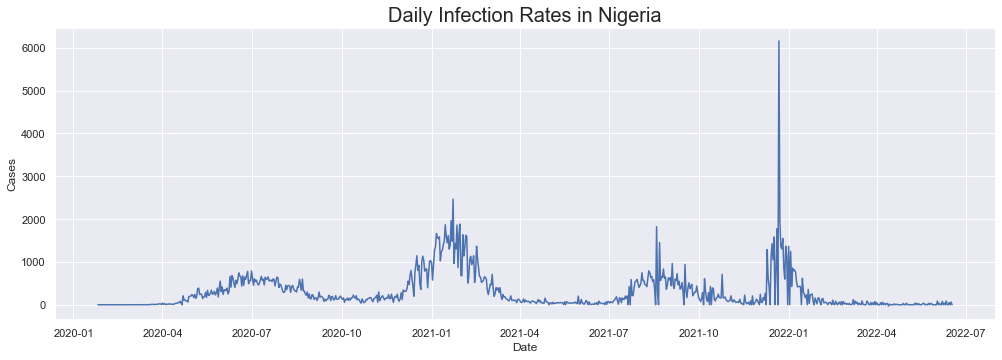

In [44]:
#Generate a line plot for the above
plt.figure(figsize=(15,5))
sns.lineplot( df_nigDayConfirmed.Date,df_nigeriaDailyInfectionRate ).set_title("Daily Infection Rates in Nigeria", fontdict = { 'fontsize': 20})

In [45]:
#Calculate maximum infection rate for a day (Number of new cases)
df_nigDayConfirmed["Daily Infection Rate"] = df_nigDayConfirmed["Cases"].diff()
maxInfectionRate = df_nigDayConfirmed["Daily Infection Rate"].max()
maxInfectionRate

6158.0

In [46]:
#Find the date
maxInfectionDate = df_nigDayConfirmed.loc[(df_nigDayConfirmed["Daily Infection Rate"] == maxInfectionRate), "Date"]
maxInfectionDate

697   2021-12-22
Name: Date, dtype: datetime64[ns]

#### The date with the maximum infection rate is 22nd December, 2021.

##### Determine the relationship between the external dataset and the NCDC COVID-19 dataset

In [48]:
#Combine the two dataset together on a common column(states)
covidCombined = pd.merge(CovidNcdc, df_covidExternal, on= 'States')
covidCombined.head()

,States,Lab_Confirmed_Cases,Admitted_Cases,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,99738,907,98062,769,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28701,29,28423,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16701,27,16520,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11307,3,11215,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10256,1,10180,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93


In [49]:
covidCombinedTop10 = covidCombined.nlargest(10, 'Lab_Confirmed_Cases' )

In [50]:
covidCombinedTop10.rename(columns= {'Overall CCVI Index': 'Overall_CCVI_Index'}, inplace=True)

In [51]:
covidCombinedTop10

,States,Lab_Confirmed_Cases,Admitted_Cases,Discharged,Deaths,region,Population,Overall_CCVI_Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,99738,907,98062,769,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28701,29,28423,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,16701,27,16520,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11307,3,11215,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,10256,1,10180,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
5,Oyo,10231,1,10028,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,7694,0,7373,321,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5810,11,5717,82,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5403,122,5170,111,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Ondo,5173,315,4749,109,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


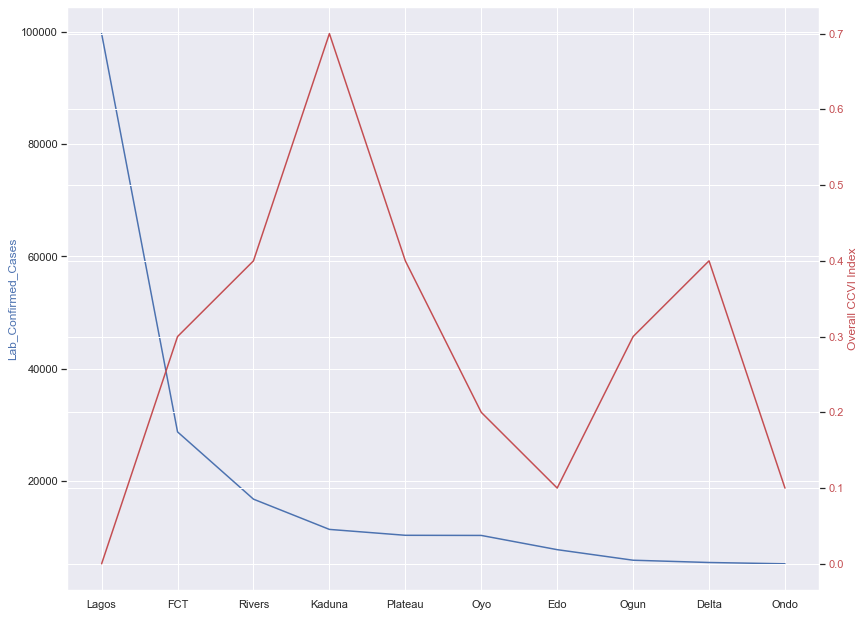

In [52]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(covidCombinedTop10.States, covidCombinedTop10.Lab_Confirmed_Cases, 'b-' )
ax1.set_ylabel('Lab_Confirmed_Cases', color='b')

ax2 = ax1.twinx()
ax2.plot(covidCombinedTop10.States, covidCombinedTop10.Overall_CCVI_Index, 'r-')
ax2.set_ylabel('Overall CCVI Index', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

<AxesSubplot:xlabel='Population Density', ylabel='Lab_Confirmed_Cases'>

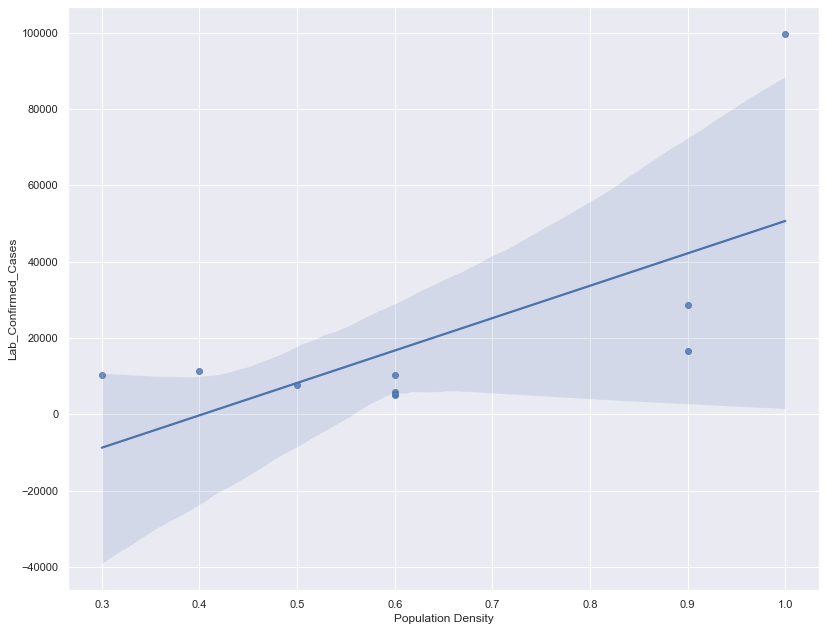

In [53]:
sns.regplot( x='Population Density', y='Lab_Confirmed_Cases', data = covidCombinedTop10,scatter=True)

In [54]:
df_realGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [55]:
mrealGDP = pd.melt(df_realGDP, id_vars =['Year'], value_vars =['Q1', 'Q2', 'Q3', 'Q4'])

In [56]:
mrealGDP.head()

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19


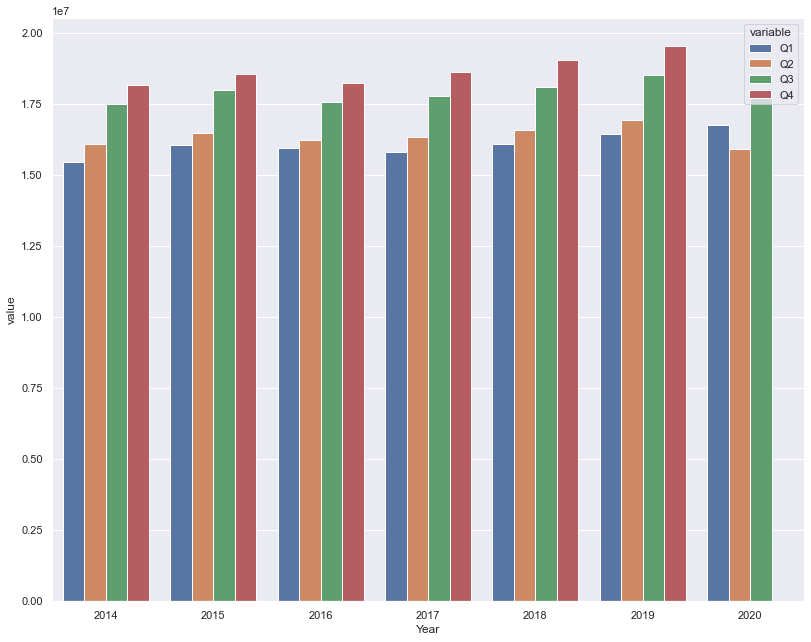

In [64]:
sns.barplot(data= mrealGDP, x='Year', y= 'value', hue='variable')
plt.axhline(y=50, xmin=2020, xmax=2020)